In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cifar=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar.load_data()


In [ ]:
print(tf.shape(x_train))
print(tf.shape(x_test))
print(tf.shape(y_train))
print(tf.shape(y_test))

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

tf.Tensor([50000    32    32     3], shape=(4,), dtype=int32)
tf.Tensor([10000    32    32     3], shape=(4,), dtype=int32)
tf.Tensor([50000     1], shape=(2,), dtype=int32)
tf.Tensor([10000     1], shape=(2,), dtype=int32)


[]

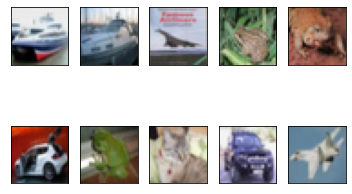

In [ ]:

for i in range(1,11):
  ax=plt.subplot(2,5,i)
  plt.imshow(x_test[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.plot()


In [ ]:

x_test=tf.keras.utils.normalize(x_test)
x_train=tf.keras.utils.normalize(x_train)
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
print(y_train[0])
print(y_test[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
input=(32,32,3)
def alexnet(input):
  model=tf.keras.Sequential()

  model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',input_shape=input))


  model.add(tf.keras.layers.Dropout(0.2))

  model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

  model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))


  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3)))

  model.add(tf.keras.layers.Flatten())

  model.add(tf.keras.layers.Dense(64,activation='relu'))

  model.add(tf.keras.layers.Dropout(0.5))

  model.add(tf.keras.layers.Dense(10,activation='softmax'))

  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

  model.save('Alexnet.h5')
  
  return model


In [ ]:
alexnet=alexnet(input)
history=alexnet.fit(x_train,y_train,epochs=100,batch_size=128)

Epoch 1/100
391/391 [==============================] - 4s 10ms/step - loss: 2.0114 - accuracy: 0.2532
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.8312 - accuracy: 0.3263
Epoch 3/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7488 - accuracy: 0.3597
Epoch 4/100
391/391 [==============================] - 4s 10ms/step - loss: 1.7024 - accuracy: 0.3818
Epoch 5/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6666 - accuracy: 0.3990
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6315 - accuracy: 0.4116
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 1.6010 - accuracy: 0.4248
Epoch 8/100
391/391 [==============================] - 4s 10ms/step - loss: 1.5767 - accuracy: 0.4344
Epoch 9/100
391/391 [==============================] - 4s 10ms/step - loss: 1.5591 - accuracy: 0.4450
Epoch 10/100
391/391 [==============================] - 4s 10ms/step - loss: 1.541

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


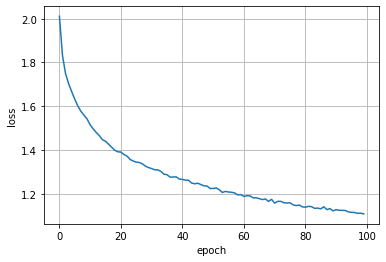

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid('True')
plt.show()

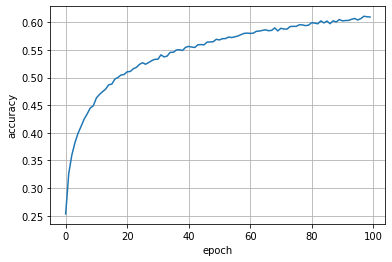

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid('True')
plt.show()

In [ ]:
alexnet.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.2030 - accuracy: 0.6088


[1.2029505968093872, 0.6087999939918518]

In [ ]:
a=alexnet.predict(x_test)

[]

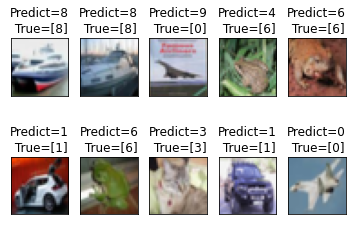

In [ ]:

for i in range(1,11):
    axes=plt.subplot(2,5,i)
    plt.imshow(x_test[i])
    axes.set_title('Predict={}\n True={}'.format(a[i].argmax(),y_test[i]))

    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    


plt.plot()
